<center>
    <h1 style="background-color: PaleTurquoise; color: rebeccapurple;">
         EXPORTS PRODUCTS FROM INDIA TO ASIAN COUNTRIES</h1>
</center>

<h3 style="color:fuchsia">CSV file:</h3>
EXPORTS TO ASIAN COUNTRIES

<h3 style="color:fuchsia">Source url:</h3>
https://indiadataportal.com/p/export-trade-statistics/r/mci-tradestat_export_lfy-cn-mn-asi

<h3 style="color:fuchsia">Number of rows and columns:</h3>
* Rows: 5348874
* Columns :15

<h3 style="color:fuchsia">Introduction:</h3>

    The "Exports to Asian Countries" dataset provides a comprehensive view of trade exports from an unspecified country (presumably India given the source) to various Asian countries. This dataset covers the periodical data of Source exports in terms of value in both USD and INR and also in terms of quantity. Each record provides the date, target Director country, type of product (both in terms of HS code and the commodity name), the value of the commodity, and the General quantity of the commodity being exported.

<h3 style="color:fuchsia"> Aim of your project:</h3>

* The products exported.
* The year which has highest export.
* Finding in which countries has highest product exported.
* Top 10 Countries by Export Value


<h1 style="background-color: LightGray;color:fuchsia"> Libraries</h1>

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

<h2 style="background-color: black; color:darkorange"> 1. Data Loading and Initial Overview </h2>


* <h3 style="background-color: GreenYellow; color: DeepPink;">Loading the dataset:</h3>

In [196]:
df = pd.read_csv(r'C:\Users\iamfiroz\Desktop\WORK BOOK\MODULE 5\PROJECT\ASIAN COUNTRY PROJECT TOPIC\exports-to-asian-countries.csv')

* <h3 style="background-color: GreenYellow; color: DeepPink;">Number of rows and columns</h3>

In [197]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (5348874, 15)


* <h3 style="background-color: GreenYellow; color: DeepPink;">Data types of each column</h3> 

In [198]:
print("Data types:")
print(df.dtypes)

Data types:
id                   int64
date                object
country_name        object
alpha_3_code        object
country_code         int64
region              object
region_code          int64
sub_region          object
sub_region_code      int64
hs_code              int64
commodity           object
unit                object
value_qt           float64
value_rs           float64
value_dl           float64
dtype: object


* <h3 style="background-color: GreenYellow; color: DeepPink;">Initial observations (e.g., head(), info(), describe())</h3> 

<h3 style="background-color: LightCyan; color: PaleVioletRed;">Head</h3>

In [199]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   id        date country_name alpha_3_code  country_code region  region_code  \
0   0  2015-01-01  Afghanistan          AFG             4   Asia          142   
1   1  2015-01-01  Afghanistan          AFG             4   Asia          142   
2   2  2015-01-01  Afghanistan          AFG             4   Asia          142   
3   3  2015-01-01  Afghanistan          AFG             4   Asia          142   
4   4  2015-01-01  Afghanistan          AFG             4   Asia          142   

      sub_region  sub_region_code  hs_code  \
0  Southern Asia               34  2023000   
1  Southern Asia               34  3061719   
2  Southern Asia               34  4021010   
3  Southern Asia               34  4021090   
4  Southern Asia               34  4022920   

                                           commodity unit  value_qt  value_rs  \
0           Boneless Meat Of Bovine Animals , Frozen  Kgs    337.00    347.09   
1                                       Other Scampi  Kgs   

<h3 style="background-color: LightCyan; color: PaleVioletRed;">Info</h3>

In [200]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348874 entries, 0 to 5348873
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   date             object 
 2   country_name     object 
 3   alpha_3_code     object 
 4   country_code     int64  
 5   region           object 
 6   region_code      int64  
 7   sub_region       object 
 8   sub_region_code  int64  
 9   hs_code          int64  
 10  commodity        object 
 11  unit             object 
 12  value_qt         float64
 13  value_rs         float64
 14  value_dl         float64
dtypes: float64(3), int64(5), object(7)
memory usage: 612.1+ MB


<h3 style="background-color: LightCyan; color: PaleVioletRed;">Describe</h3>

In [201]:
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
                 id  country_code  region_code  sub_region_code       hs_code  \
count  5.348874e+06  5.348874e+06    5348874.0     5.348874e+06  5.348874e+06   
mean   2.674436e+06  4.464536e+02        142.0     7.214627e+01  5.571467e+07   
std    1.544087e+06  2.475116e+02          0.0     5.309008e+01  2.637186e+07   
min    0.000000e+00  4.000000e+00        142.0     3.000000e+01  1.012100e+06   
25%    1.337218e+06  1.580000e+02        142.0     3.400000e+01  3.204134e+07   
50%    2.674436e+06  4.580000e+02        142.0     3.500000e+01  5.903201e+07   
75%    4.011655e+06  6.820000e+02        142.0     1.450000e+02  8.415839e+07   
max    5.348873e+06  8.870000e+02        142.0     1.450000e+02  1.000000e+08   

           value_qt      value_rs      value_dl  
count  5.303585e+06  5.348850e+06  5.065986e+06  
mean   4.867739e+04  1.352006e+02  2.504703e-01  
std    3.783406e+06  3.106449e+03  4.937564e+00  
min    0.000000e+00  0.000000e+00  0.000000e+0

<h2 style="background-color: black; color:darkorange">  2. Data Pre-processing</h2> 
<h4  style="color:RoyalBlue"> Perform all necessary cleaning steps such as:</h4>

* <h3 style="background-color: GreenYellow; color: DeepPink;"> Handling missing values:</h3>

In [202]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                      0
date                    0
country_name            0
alpha_3_code            0
country_code            0
region                  0
region_code             0
sub_region              0
sub_region_code         0
hs_code                 0
commodity               0
unit                 5838
value_qt            45289
value_rs               24
value_dl           282888
dtype: int64


* <h3 style="background-color: GreenYellow; color: DeepPink;">Removing Columns</h3>

In [203]:
df = df.drop(columns=['id', 'alpha_3_code', 'country_code', 'region_code', 'sub_region_code', 'hs_code'])

* <h3 style="background-color: GreenYellow; color: DeepPink;">Removing duplicates</h3>

In [204]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
               date country_name region          sub_region commodity unit  \
335      2015-01-01  Afghanistan   Asia       Southern Asia    Others  Nos   
5904     2015-01-01        China   Asia        Eastern Asia    Others  Kgs   
16507    2015-01-01     Malaysia   Asia  South-eastern Asia    Others  Kgs   
17477    2015-01-01     Malaysia   Asia  South-eastern Asia    Others  Nos   
17625    2015-01-01     Malaysia   Asia  South-eastern Asia    Others  Nos   
...             ...          ...    ...                 ...       ...  ...   
5347304  2025-07-01     Viet Nam   Asia  South-eastern Asia     Other  Kgs   
5347956  2025-07-01     Viet Nam   Asia  South-eastern Asia    Others  Nos   
5348218  2025-07-01     Viet Nam   Asia  South-eastern Asia    Others  Nos   
5348295  2025-07-01     Viet Nam   Asia  South-eastern Asia    Others  Nos   
5348308  2025-07-01     Viet Nam   Asia  South-eastern Asia    Others  Nos   

         value_qt  value_rs  value_dl  
335    

* <h3 style="background-color: GreenYellow; color: DeepPink;">Counting duplicates</h3>

In [205]:
# Count of duplicate rows
duplicate_count = len(duplicate_rows)
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 4664


* <h3 style="background-color: GreenYellow; color: DeepPink;">Remove duplicate rows</h3>

In [206]:
df = df.drop_duplicates() 

* <h3 style="background-color: GreenYellow; color: DeepPink;">Filtering products</h3>

In [207]:
# Get unique values in the commodity column
unique_products = df['commodity'].unique()

In [208]:
# Display the unique products
print("Unique products in commodity column:")
print(unique_products)

Unique products in commodity column:
['Boneless Meat Of Bovine Animals , Frozen' 'Other Scampi' 'Skimmed Milk'
 ... 'Acid Green 38(Alizarine Cyanine Green 3G)'
 'Goods Specified In Supplementary Note 4 To This Chapter'
 'Goods Specified In Supplementary Note 10 To This Chapter']


* <h3 style="background-color: GreenYellow; color: DeepPink;">Counting types of products</h3>

In [209]:
# how many unique products there are
print(f"Number of unique products: {len(unique_products)}")

Number of unique products: 11030


* <h3 style="background-color: GreenYellow; color: DeepPink;">Correcting data types</h3>

In [210]:
df['date'] = pd.to_datetime(df['date'])

* <h3 style="background-color: GreenYellow; color: DeepPink;">Creating derived columns </h3>

In [211]:
df['year'] = df['date'].dt.year
print(df['year'])

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
5348869    2025
5348870    2025
5348871    2025
5348872    2025
5348873    2025
Name: year, Length: 5344210, dtype: int32


In [212]:
# extracting month from date
df['month'] = df['date'].dt.month

In [213]:
# Create a dictionary mapping month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [214]:
df['month'] = df['month'].map(month_names)
print(df['month'])

0          January
1          January
2          January
3          January
4          January
            ...   
5348869       July
5348870       July
5348871       July
5348872       July
5348873       July
Name: month, Length: 5344210, dtype: object


* <h3 style="background-color: GreenYellow; color: DeepPink;">Finding Unique products using cvc</h3>

In [215]:
unique_commodities = df['commodity'].unique()

unique_df = pd.DataFrame({'unique_commodities': unique_commodities})

# Write the unique commodities to a new CSV file
unique_df.to_csv('unique_commodities2.csv', index=False)

print(f"Successfully wrote {len(unique_commodities)} unique commodities to 'unique_commodities2.csv'")

Successfully wrote 11030 unique commodities to 'unique_commodities2.csv'


* <h3 style="background-color: GreenYellow; color: DeepPink;">Removing words</h3>

In [216]:
df['commodity'] = df['commodity'].str.replace('Otr ', '')

In [217]:
df['commodity'] = df['commodity'].str.replace('Othr ', '')

In [218]:
df['commodity'] = df['commodity'].str.replace('Othrs ', '')

In [219]:
df['commodity'] = df['commodity'].str.replace('Others, ', '')

In [220]:
df['commodity'] = df['commodity'].str.replace('Other ', '')

In [221]:
df['commodity'] = df['commodity'].str.replace('(', '')

In [222]:
df['commodity'] = df['commodity'].str.replace(')', '')

In [223]:
df['commodity'] = df['commodity'].str.replace('-', '')

In [224]:
df['commodity'] = df['commodity'].str.replace('* Other', '')

In [225]:
df['commodity'] = df['commodity'].str.replace('*0Ther ', '')

In [226]:
df['commodity'] = df['commodity'].str.replace('"', '')

In [227]:
df['commodity'] = df['commodity'].str.replace('*', '')

In [228]:
df['commodity'] = df['commodity'].str.replace('0Ther ', '')

In [229]:
df['commodity'] = df['commodity'].str.replace('0Thers', '')

In [230]:
df['commodity'] = df['commodity'].str.replace('0Thr ', '')

In [231]:
df['commodity'] = df['commodity'].str.replace('Others ', '')

In [232]:
df['commodity'] = df['commodity'].str.replace('Others', '')

In [233]:
df['commodity'] = df['commodity'].str.replace('Othr', '')

In [234]:
df['commodity'] = df['commodity'].str.replace('Others', '')

In [235]:
df['commodity'] = df['commodity'].str.replace('Other/', '')

In [236]:
df['commodity'] = df['commodity'].str.replace('Other, ', '')

In [237]:
df['commodity'] = df['commodity'].str.replace('Other,', '')

In [238]:
df['commodity'] = df['commodity'].str.replace('Other', '')

In [239]:
df['commodity'] = df['commodity'].str.replace('Of ', '')

* <h3 style="background-color: GreenYellow; color: DeepPink;">Filling missing values:</h3> 

In [240]:
df['value_qt'] = df['value_qt'].fillna(df['value_qt'].median())
df['value_rs'] = df['value_rs'].fillna(df['value_rs'].median())
df['value_dl'] = df['value_dl'].fillna(df['value_dl'].median())
most_common_unit = df['unit'].mode()[0] 
df['unit'] = df['unit'].fillna(most_common_unit)
mode_commodity = df['commodity'].mode()[0]
df['commodity'] = df['commodity'].fillna(mode_commodity)
df = df[df['commodity'] != '']

In [241]:
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
date            0
country_name    0
region          0
sub_region      0
commodity       0
unit            0
value_qt        0
value_rs        0
value_dl        0
year            0
month           0
dtype: int64


* <h3 style="background-color: GreenYellow; color: DeepPink;">Filtering</h3>

In [242]:
unique_countries = df['country_name'].unique()
print(f"Country:{unique_countries}")

Country:['Afghanistan' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Bhutan'
 'Brunei Darussalam' 'Cambodia' 'China' 'Cyprus'
 "Democratic People's Republic of Korea" 'Georgia' 'Hong Kong' 'Indonesia'
 'Iraq' 'Islamic Republic of Iran' 'Israel' 'Japan' 'Jordan' 'Kazakhstan'
 'Kuwait' 'Kyrgyzstan' "Lao People's Democratic Republic" 'Lebanon'
 'Macao' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar' 'Nepal' 'Oman'
 'Pakistan' 'Philippines' 'Qatar' 'Republic of Korea' 'Saudi Arabia'
 'Singapore' 'Sri Lanka' 'Syrian Arab Republic'
 'Taiwan, Province of China' 'Tajikistan' 'Thailand' 'Timor-Leste'
 'Turkmenistan' 'Turkiye' 'United Arab Emirates' 'Uzbekistan' 'Viet Nam'
 'Yemen' 'State of Palestine' 'Türkiye']


In [243]:
num_countries = df['country_name'].nunique()
print(f"Number of unique country names: {num_countries}")

Number of unique country names: 51


In [244]:
unique_sub_region = df['sub_region'].unique()
print(f"Sub_region:{unique_sub_region}")

Sub_region:['Southern Asia' 'Western Asia' 'South-eastern Asia' 'Eastern Asia'
 'Central Asia']


In [245]:
num_countries = df['sub_region'].nunique()
print(f"Number of unique Sub_region: {num_countries}")

Number of unique Sub_region: 5


In [246]:
unique_products_O = df[df['commodity'].str.startswith('O')]['commodity'].unique()
print(unique_products_O)

['Oxytetracycline' 'Omeprazole And Lansoprazole' 'Othe Parts Fr Use'
 'Objective Lenses' 'Ophthalmic Surgical Instrmnt And Appliances'
 'Oil Seed Crushng/Grndng Mchnry Including For Extrctn/Prpn Anml/Vgtbl Fatsandoils'
 'Onions Fresh Or Chilled' 'Organic SurfaceActive ProdToilet'
 'Organic SurfaceActive Product Nes'
 'Orngc SrfceActv Agnts W/N For Rtl Sl' 'Odhani,Cotton,N.E.S.'
 'Optical Media Hdg 852349'
 'Optical Fibre Cables Thn Lead Alloy Sheathd Cables'
 'Orthopeaedic Or Fracture Appliances' 'Onions Dried'
 'Oranges Fresh Or Dried' 'Oleoresins'
 'Oil Cake Soyabean,Solvent Extracted Defatted Variety'
 'OilCake And OilCake Meal Mustard Seeds Expeller Variety' 'Oxygen'
 'Oleum' 'Oxides,Hydroxides And Peroxide Strontium Or Barium'
 'OrthoChloroBenzaldehyde' 'Oleic Linoleic Acids And Their Salts Andestrs'
 'Oxalic Acid' 'Ortho Toluidine'
 'OMPPhnylenediamine Diaminotoluene And Their Drvtvs Salts Thereof'
 'OrganoSulphur Compnds'
 'Othe Cmpnds Cntng In Structure A Quinolineor Isoquinoli

* <h3 style="background-color: GreenYellow; color: DeepPink">Aggregate</h3>

In [247]:
# group by country and see all commodities for each country
country_commodities = df.groupby('country_name')['commodity'].unique()
print(country_commodities)

country_name
Afghanistan                              [Boneless Meat Bovine Animals , Frozen, Scampi...
Armenia                                  [Boneless Meat Bovine Animals , Frozen, Mango ...
Azerbaijan                               [Boneless Meat Bovine Animals , Frozen, Edible...
Bahrain                                  [Boneless Meat Bovn Anmls, Frsh Or Chld, Bonel...
Bangladesh                               [Salmonide Fresh Or Chilled Excl Heading 03029...
Bhutan                                   [Meat/Edbl Ofal Fowls The Spcs Gals Domesticus...
Brunei Darussalam                        [Boneless Meat Bovine Animals , Frozen, Seer F...
Cambodia                                 [Grapes Fresh, Groats And Meal Maize Corn, Sta...
China                                    [Freshwater Ornamental Fish, Live Eels Anguill...
Cyprus                                   [Crabs Frozen, Scampi, Shrimps And Prawns, Cut...
Democratic People's Republic of Korea    [Tunas Frozen Excl Heading 030391 To

In [248]:
# Aggregate by country_name
region_aggregation = df.groupby('country_name').agg({
    'value_rs': 'sum',
    'value_dl': 'mean'
})
print(region_aggregation)

                                           value_rs  value_dl
country_name                                                 
Afghanistan                            3.227301e+06  0.124722
Armenia                                1.831065e+05  0.068946
Azerbaijan                             2.029124e+05  0.050190
Bahrain                                2.644864e+06  0.046978
Bangladesh                             4.012428e+07  0.280076
Bhutan                                 2.773694e+06  0.031755
Brunei Darussalam                      2.283622e+05  0.025046
Cambodia                               7.235184e+05  0.049482
China                                  6.803718e+07  0.630957
Cyprus                                 5.920736e+05  0.054902
Democratic People's Republic of Korea  1.588005e+05  0.045220
Georgia                                4.577955e+05  0.048608
Hong Kong                              5.821104e+07  0.858880
Indonesia                              2.062661e+07  0.238639
Iraq    

* <h3 style="background-color: GreenYellow; color: DeepPink">Checking data handling</h3>

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4860754 entries, 0 to 5348873
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   country_name  object        
 2   region        object        
 3   sub_region    object        
 4   commodity     object        
 5   unit          object        
 6   value_qt      float64       
 7   value_rs      float64       
 8   value_dl      float64       
 9   year          int32         
 10  month         object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 426.5+ MB


<h2 style="background-color: black; color:darkorange">  3. Exploratory Data Analysis (EDA) </h2>

* <h3 style="background-color: GreenYellow; color: DeepPink">Univariate Analysis:</h3> 

In [250]:
# 1. Univariate Analysis
# Statistical summary of numerical columns
numerical_summary = df.describe()
print("Statistical Summary of Numerical Columns:")
print(numerical_summary)

Statistical Summary of Numerical Columns:
                                date      value_qt      value_rs  \
count                        4860754  4.860754e+06  4.860754e+06   
mean   2019-10-10 01:31:25.264548864  5.072107e+04  1.350555e+02   
min              2015-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2017-05-01 00:00:00  1.500000e-01  2.900000e-01   
50%              2019-06-01 00:00:00  2.480000e+00  3.270000e+00   
75%              2021-07-01 00:00:00  4.000000e+01  2.451000e+01   
max              2025-07-01 00:00:00  2.046347e+09  9.778869e+05   
std                              NaN  3.935808e+06  3.127115e+03   

           value_dl          year  
count  4.860754e+06  4.860754e+06  
mean   2.380684e-01  2.019314e+03  
min    0.000000e+00  2.015000e+03  
25%    0.000000e+00  2.017000e+03  
50%    1.000000e-02  2.019000e+03  
75%    5.000000e-02  2.021000e+03  
max    1.517490e+03  2.025000e+03  
std    4.847558e+00  3.032933e+00  


In [251]:
# Frequency distribution of categorical columns
print("\nFrequency Distribution of Country:")
print(df['country_name'].value_counts())


Frequency Distribution of Country:
country_name
Nepal                                    376561
United Arab Emirates                     369942
Sri Lanka                                264218
Bangladesh                               255348
Singapore                                210221
Malaysia                                 204019
Saudi Arabia                             201642
China                                    182413
Thailand                                 178733
Bhutan                                   175235
Japan                                    174323
Oman                                     156963
Indonesia                                150091
Qatar                                    148475
Viet Nam                                 138409
Republic of Korea                        137572
Turkiye                                  133776
Kuwait                                   132687
Philippines                              117325
Maldives                               

In [252]:
print("\nFrequency Distribution of Region:")
print(df['region'].value_counts())


Frequency Distribution of Region:
region
Asia    4860754
Name: count, dtype: int64


* <h3 style="background-color: GreenYellow; color: DeepPink">Multivariate Analysis:</h3>

In [253]:
# Correlation analysis
correlation = df.select_dtypes(include=[np.number]).corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
          value_qt  value_rs  value_dl      year
value_qt  1.000000  0.001104  0.106557  0.021763
value_rs  0.001104  1.000000  0.940786 -0.014774
value_dl  0.106557  0.940786  1.000000 -0.000243
year      0.021763 -0.014774 -0.000243  1.000000


* <h3 style="background-color: GreenYellow; color: DeepPink">Correlation Analysis</h3> 

In [254]:
# Correlation analysis between numerical columns
correlation_matrix = df[['value_qt', 'value_rs', 'value_dl']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          value_qt  value_rs  value_dl
value_qt  1.000000  0.001104  0.106557
value_rs  0.001104  1.000000  0.940786
value_dl  0.106557  0.940786  1.000000


* <h3 style="background-color: GreenYellow; color: DeepPink">Groupby</h3>

In [255]:
# Advanced groupby - Average value by region and sub-region
region_subregion_avg = df.groupby(['region', 'sub_region'])['value_rs'].mean().reset_index()
print("\nAverage Value by Region and Sub-region:")
print(region_subregion_avg.head(10))


Average Value by Region and Sub-region:
  region          sub_region    value_rs
0   Asia        Central Asia   30.720915
1   Asia        Eastern Asia  245.086720
2   Asia  South-eastern Asia  131.208879
3   Asia       Southern Asia   85.016221
4   Asia        Western Asia  135.398728


In [256]:
# Group by country and calculate mean values
country_analysis = df.groupby('country_name').agg({
    'value_qt': 'mean',
    'value_rs': 'mean',
    'value_dl': 'mean'
}).reset_index()

print("Country Analysis:")
print(country_analysis.head())

Country Analysis:
  country_name       value_qt    value_rs  value_dl
0  Afghanistan    8532.018500   79.897536  0.124722
1      Armenia    4829.534245   27.980814  0.068946
2   Azerbaijan    4540.471721   24.930878  0.050190
3      Bahrain    8478.075829   26.481738  0.046978
4   Bangladesh  144353.720714  157.135657  0.280076


* <h3 style="background-color: GreenYellow; color: DeepPink">Pivot Table</h3>

In [257]:
# Create a pivot table to analyze commodity values by region
pivot_region_commodity = pd.pivot_table(
    df, 
    values='value_dl',
    index='sub_region',
    columns='commodity',
    aggfunc='sum'
)
print("\nPivot Table - Region by Commodity:")
print(pivot_region_commodity.head())


Pivot Table - Region by Commodity:
commodity            Brominated Or Iodinated Derivatives Acyclic Hydrocarbons  \
sub_region                                                                      
Central Asia                                                      NaN           
Eastern Asia                                                     1.23           
South-eastern Asia                                               2.42           
Southern Asia                                                    0.00           
Western Asia                                                     0.01           

commodity            LightEmitting Diode Led Lamps      ,  ,Dried  \
sub_region                                                          
Central Asia                                  0.00   0.01    0.01   
Eastern Asia                                  1.87   1.10    1.36   
South-eastern Asia                            0.60   0.68    5.38   
Southern Asia                                 9.81 

* <h3 style="background-color: GreenYellow; color: DeepPink">Time series Analysis</h3>

In [258]:
# Time series analysis - Monthly trend by year
if 'date' in df.columns:
    df['year_month'] = df['date'].dt.to_period('M')
    monthly_trend = df.groupby('year_month')['value_rs'].mean()
    print(monthly_trend)    

year_month
2015-01    180.534511
2015-02    161.114568
2015-03    164.299913
2015-04    158.298688
2015-05    146.438019
              ...    
2025-03      2.072486
2025-04      2.020094
2025-05      1.950872
2025-06      1.824786
2025-07      1.892182
Freq: M, Name: value_rs, Length: 100, dtype: float64


* <h3 style="background-color: GreenYellow; color: DeepPink">Generate statistical summaries to support findings</h3>

In [259]:
summary_stats = df.describe(include='all')
print(summary_stats)

                                 date country_name   region    sub_region  \
count                         4860754      4860754  4860754       4860754   
unique                            NaN           51        1             5   
top                               NaN        Nepal     Asia  Western Asia   
freq                              NaN       376561  4860754       1619472   
mean    2019-10-10 01:31:25.264548864          NaN      NaN           NaN   
min               2015-01-01 00:00:00          NaN      NaN           NaN   
25%               2017-05-01 00:00:00          NaN      NaN           NaN   
50%               2019-06-01 00:00:00          NaN      NaN           NaN   
75%               2021-07-01 00:00:00          NaN      NaN           NaN   
max               2025-07-01 00:00:00          NaN      NaN           NaN   
std                               NaN          NaN      NaN           NaN   

       commodity     unit      value_qt      value_rs      value_dl  \
coun

In [260]:
# You can also get specific statistics for numerical columns
numerical_summary = df[['value_qt', 'value_rs', 'value_dl']].describe()
print("\nNumerical columns summary:")
print(numerical_summary)


Numerical columns summary:
           value_qt      value_rs      value_dl
count  4.860754e+06  4.860754e+06  4.860754e+06
mean   5.072107e+04  1.350555e+02  2.380684e-01
std    3.935808e+06  3.127115e+03  4.847558e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.500000e-01  2.900000e-01  0.000000e+00
50%    2.480000e+00  3.270000e+00  1.000000e-02
75%    4.000000e+01  2.451000e+01  5.000000e-02
max    2.046347e+09  9.778869e+05  1.517490e+03


In [261]:
# For categorical columns, you might want to see value counts
print("\nCountry distribution:")
print(df['country_name'].value_counts().head())


Country distribution:
country_name
Nepal                   376561
United Arab Emirates    369942
Sri Lanka               264218
Bangladesh              255348
Singapore               210221
Name: count, dtype: int64


<h2 style="background-color: black; color:darkorange"> 4. Visualizations</h2>

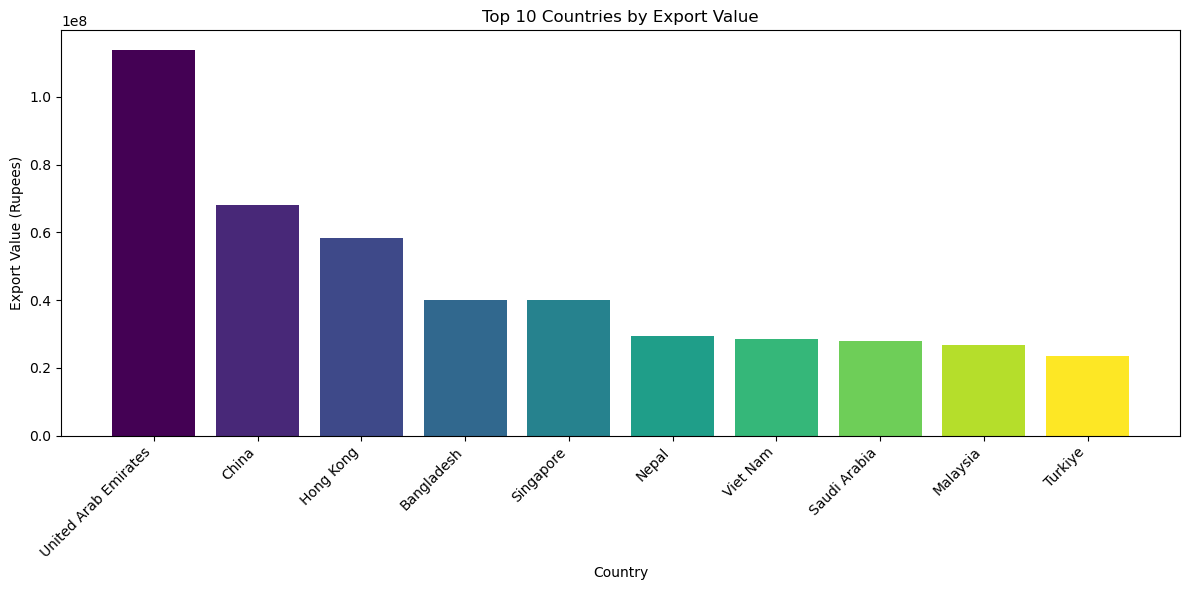

In [262]:
export_by_country = df.groupby('country_name')['value_rs'].sum().reset_index()

export_by_country = export_by_country.sort_values('value_rs', ascending=False)

top_countries = export_by_country.head(10)

plt.figure(figsize=(12, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(top_countries)))

plt.bar(top_countries['country_name'], top_countries['value_rs'], color=colors)
plt.title('Top 10 Countries by Export Value')
plt.xlabel('Country')
plt.ylabel('Export Value (Rupees)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

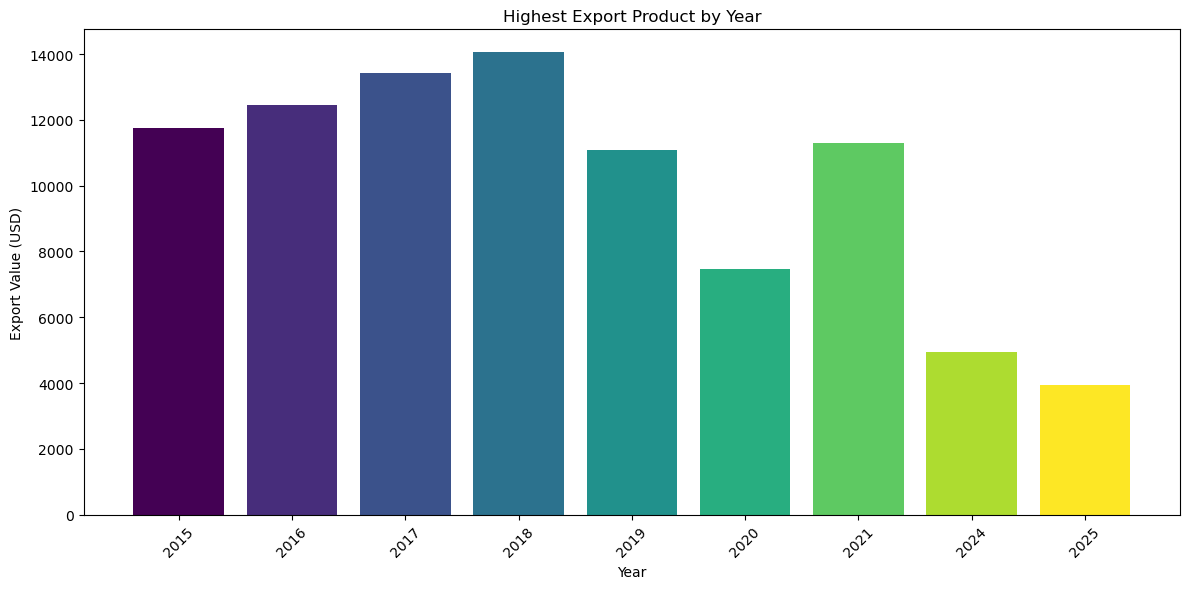

In [263]:
yearly_exports = df.groupby(['year', 'commodity'])['value_dl'].sum().reset_index()

highest_exports = yearly_exports.loc[yearly_exports.groupby('year')['value_dl'].idxmax()]

plt.figure(figsize=(12, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(highest_exports)))
bars = plt.bar(highest_exports['year'].astype(str), highest_exports['value_dl'], color=colors)

plt.xlabel('Year')
plt.ylabel('Export Value (USD)')
plt.title('Highest Export Product by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* <h3 style="background-color: GreenYellow; color: DeepPink">Bar plot of commodity counts</h3>

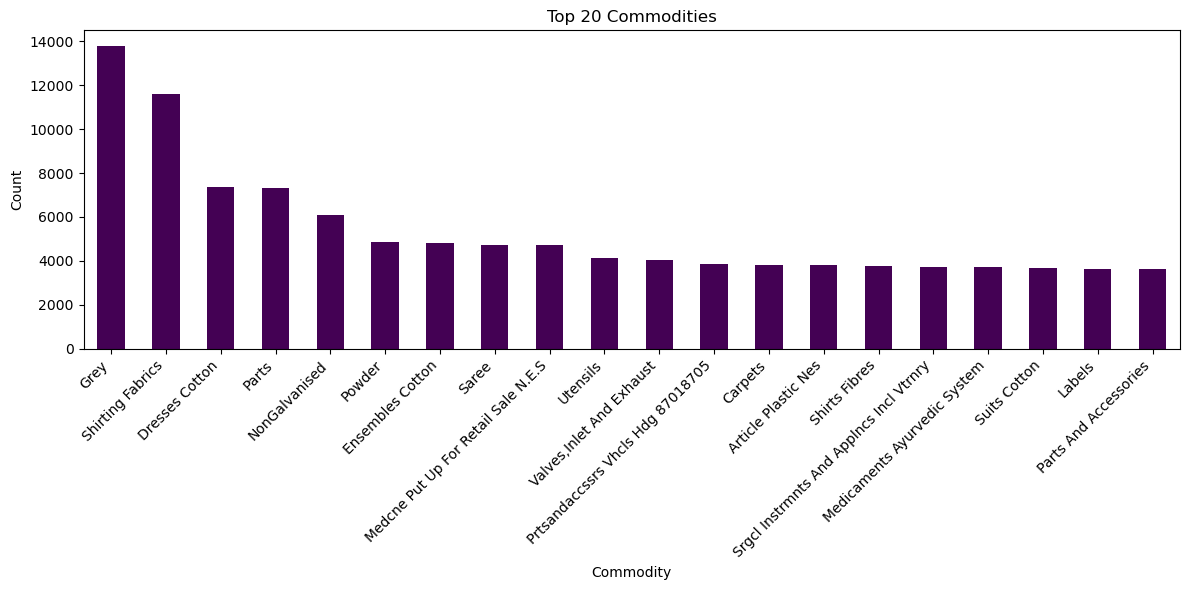

In [264]:
commodity_counts = df['commodity'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
commodity_counts.plot(kind='bar', colormap='viridis')  
plt.title('Top 20 Commodities')
plt.xlabel('Commodity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

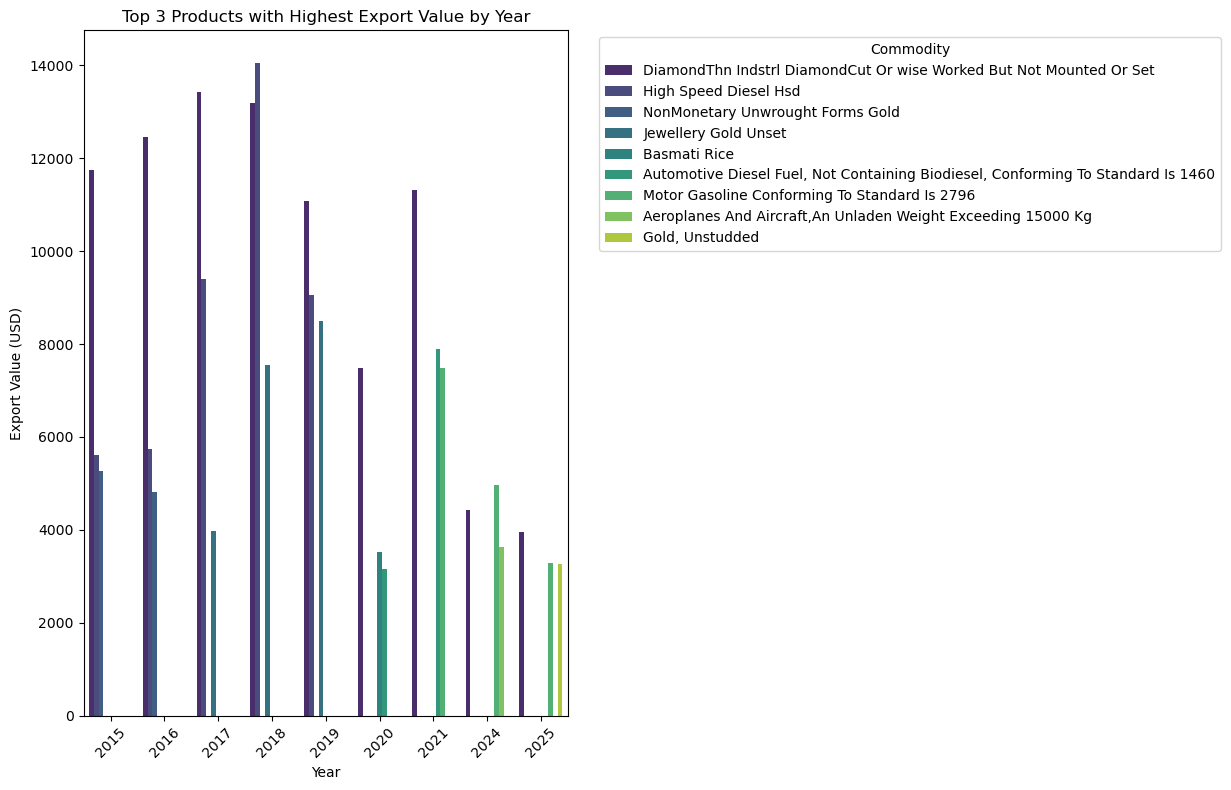

In [265]:
top_exports = df.groupby(['year', 'commodity'])['value_dl'].sum().reset_index()

# For each year, find the top 3 products by export value
top_3_by_year = top_exports.sort_values(['year', 'value_dl'], ascending=[True, False]).groupby('year').head(3)
 
plt.figure(figsize=(15, 8))  
chart = sns.barplot(x='year', y='value_dl', hue='commodity', data=top_3_by_year, palette='viridis') 
plt.title('Top 3 Products with Highest Export Value by Year')
plt.xlabel('Year')
plt.ylabel('Export Value (USD)')
plt.xticks(rotation=45)
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to make room for the legend
plt.show()

* <h3 style="background-color: GreenYellow; color: DeepPink">Bar chart of the top 10 exports</h3>

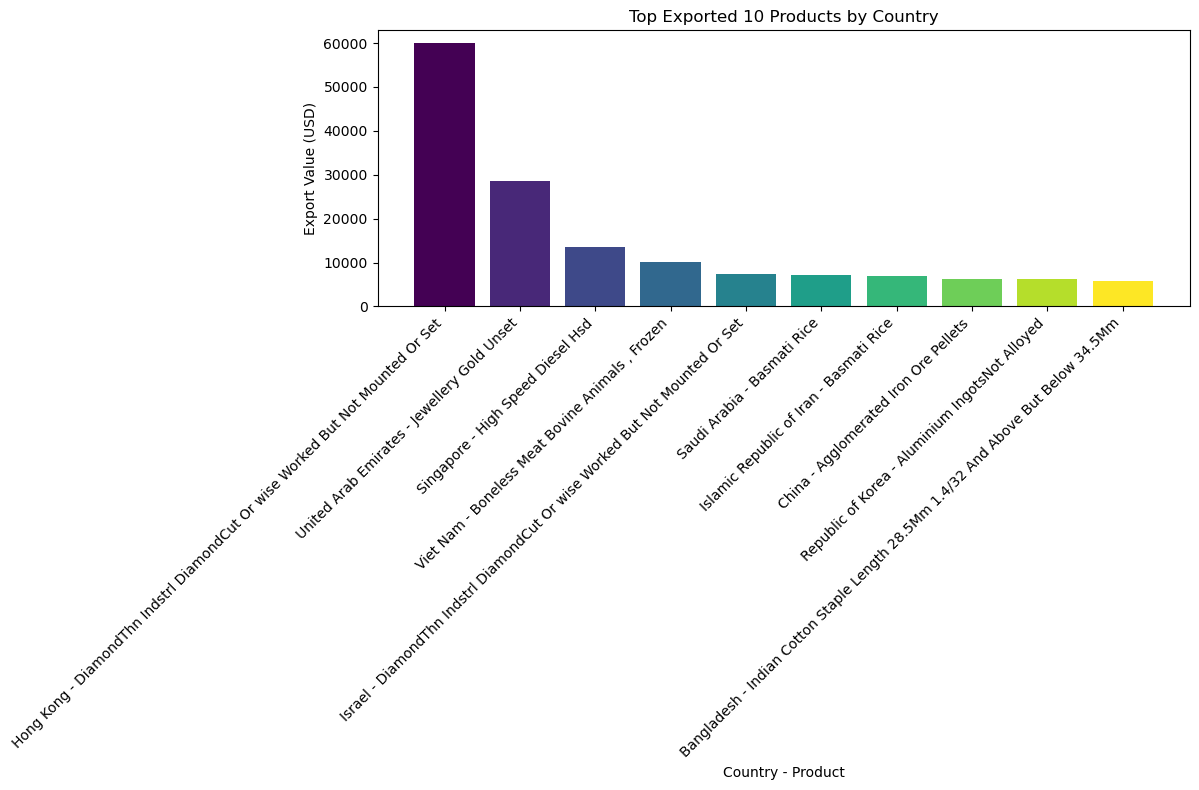

In [266]:
export_summary = df.groupby(['country_name', 'commodity'])['value_dl'].sum().reset_index()

top_exports = export_summary.loc[export_summary.groupby('country_name')['value_dl'].idxmax()]

top_exports_sorted = top_exports.sort_values('value_dl', ascending=False)

plt.figure(figsize=(12, 8))
top_10 = top_exports_sorted.head(10)

colors = cm.viridis(np.linspace(0, 1, len(top_10)))

plt.bar(top_10['country_name'] + ' - ' + top_10['commodity'], top_10['value_dl'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top Exported 10 Products by Country')
plt.xlabel('Country - Product')
plt.ylabel('Export Value (USD)')
plt.tight_layout()
plt.show()

* <h3 style="background-color: GreenYellow; color: DeepPink">Scatterplot</h3>

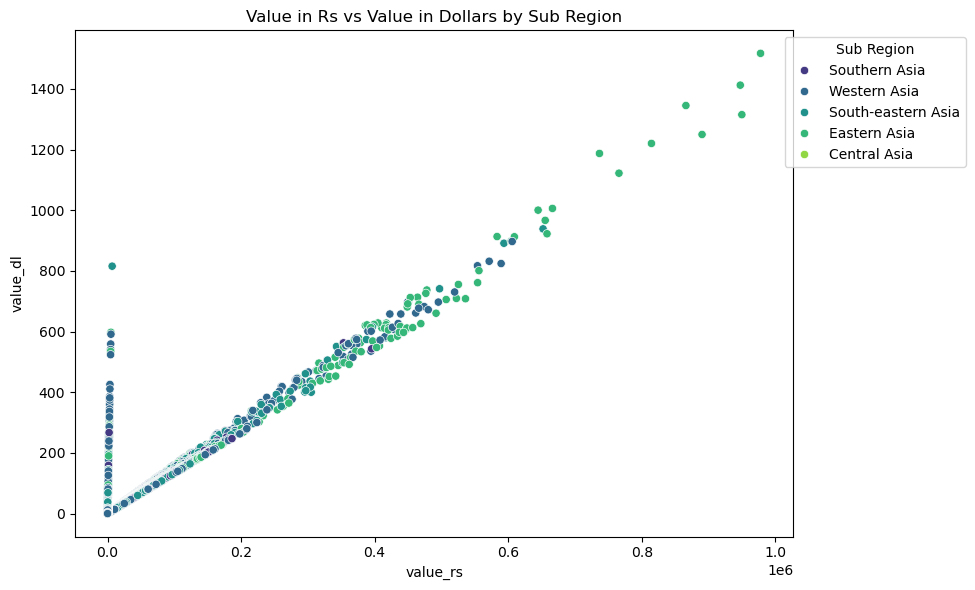

In [267]:
# Create the scatterplot with a specified legend location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_rs', y='value_dl', hue='sub_region', data=df,palette='viridis')
plt.title('Value in Rs vs Value in Dollars by Sub Region')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Sub Region')
plt.tight_layout()  
plt.show()

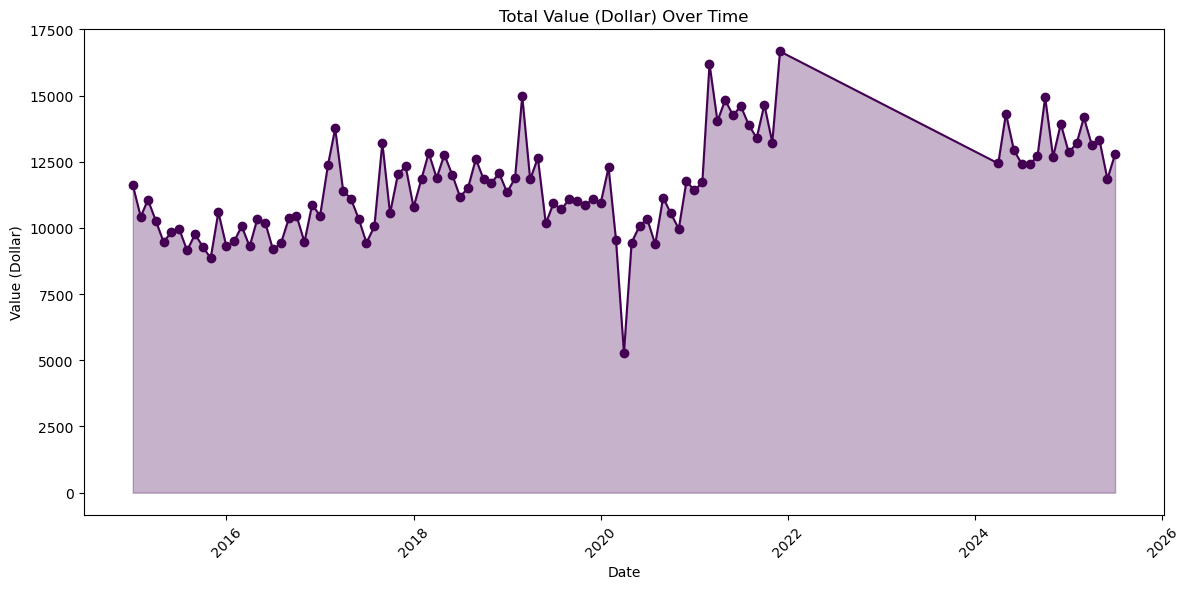

In [268]:
# Line chart of value_dl over time
plt.figure(figsize=(12, 6))
df_time = df.groupby('date')['value_dl'].sum().reset_index()

# Plot with viridis colormap for fill
plt.plot(df_time['date'], df_time['value_dl'], marker='o', color='#440154')  
plt.fill_between(df_time['date'], df_time['value_dl'], alpha=0.3, color='#440154')  

plt.title('Total Value (Dollar) Over Time')
plt.xlabel('Date')
plt.ylabel('Value (Dollar)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

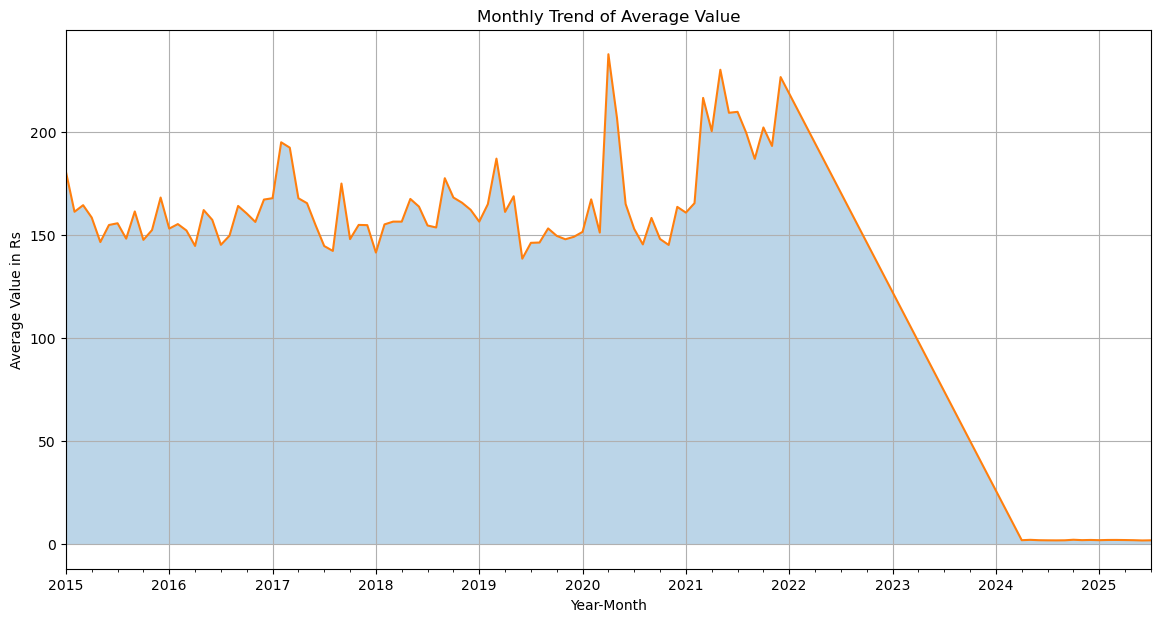

In [269]:
# Time series analysis - Monthly trend by year
if 'date' in df.columns:
    df['year_month'] = df['date'].dt.to_period('M')
    monthly_trend = df.groupby('year_month')['value_rs'].mean()
    
    plt.figure(figsize=(14, 7))
    
    monthly_trend.plot(color=['#ff7f0e'])  
    plt.title('Monthly Trend of Average Value')
    plt.xlabel('Year-Month')
    plt.ylabel('Average Value in Rs')
    plt.grid(True)
    plt.fill_between(monthly_trend.index.astype(str), monthly_trend.values, alpha=0.3)  
    plt.show()

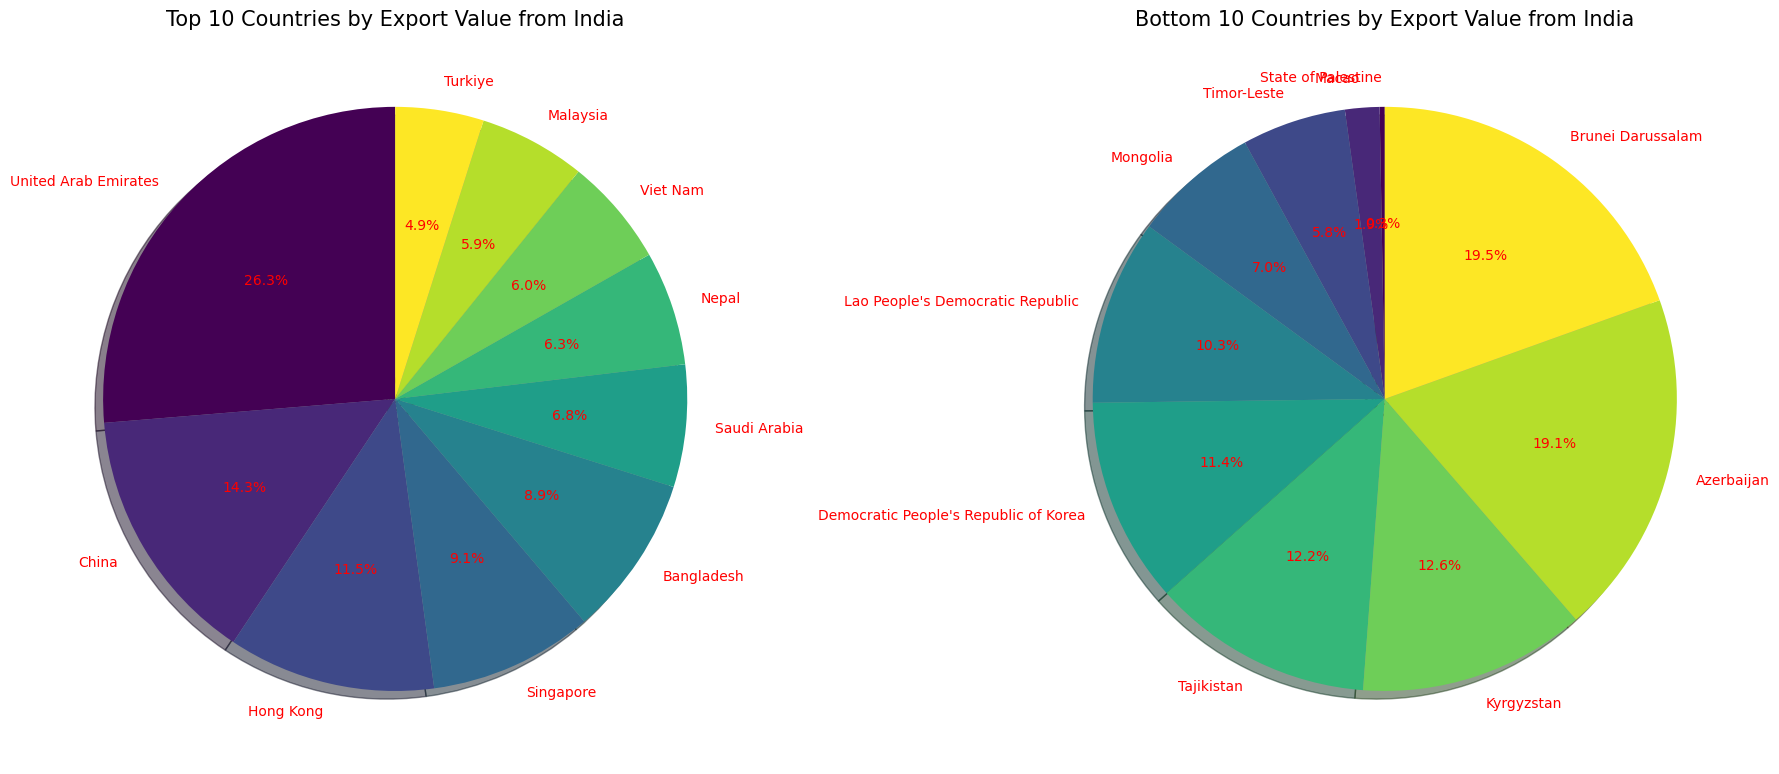

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

top_countries = df.groupby('country_name')['value_dl'].sum().nlargest(10)

ax1.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', 
        shadow=True, startangle=90, 
        colors=plt.cm.viridis(np.linspace(0, 1, len(top_countries))),
        textprops={'color': 'Red'})  
ax1.set_title('Top 10 Countries by Export Value from India', fontsize=15)

bottom_countries = df.groupby('country_name')['value_dl'].sum().nsmallest(10)

ax2.pie(bottom_countries, labels=bottom_countries.index, autopct='%1.1f%%', 
        shadow=True, startangle=90, 
        colors=plt.cm.viridis(np.linspace(0, 1, len(bottom_countries))),
        textprops={'color': 'Red'})  
ax2.set_title('Bottom 10 Countries by Export Value from India', fontsize=15)

plt.tight_layout()
plt.show()

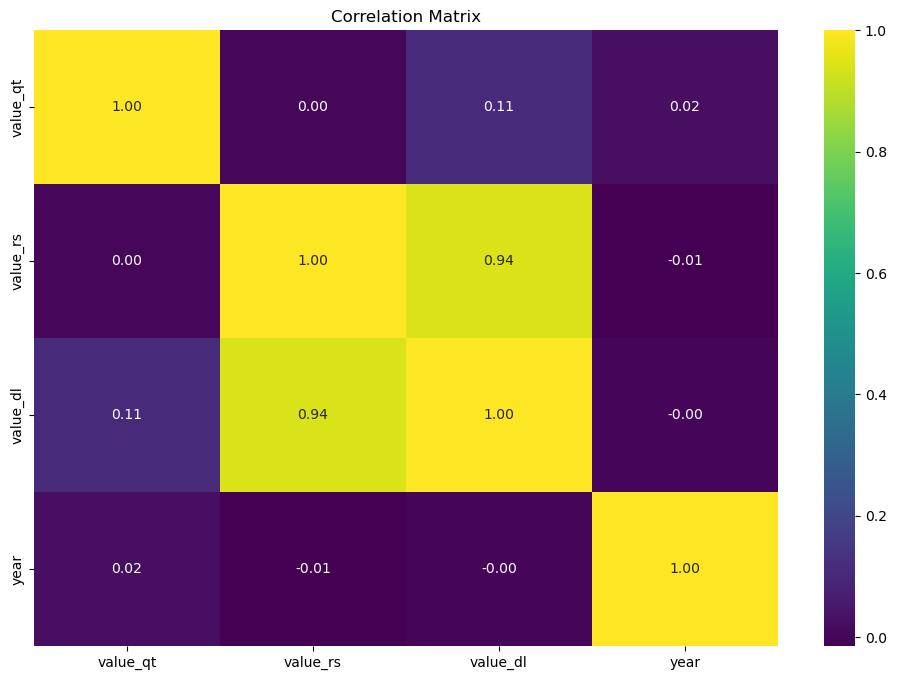

In [271]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

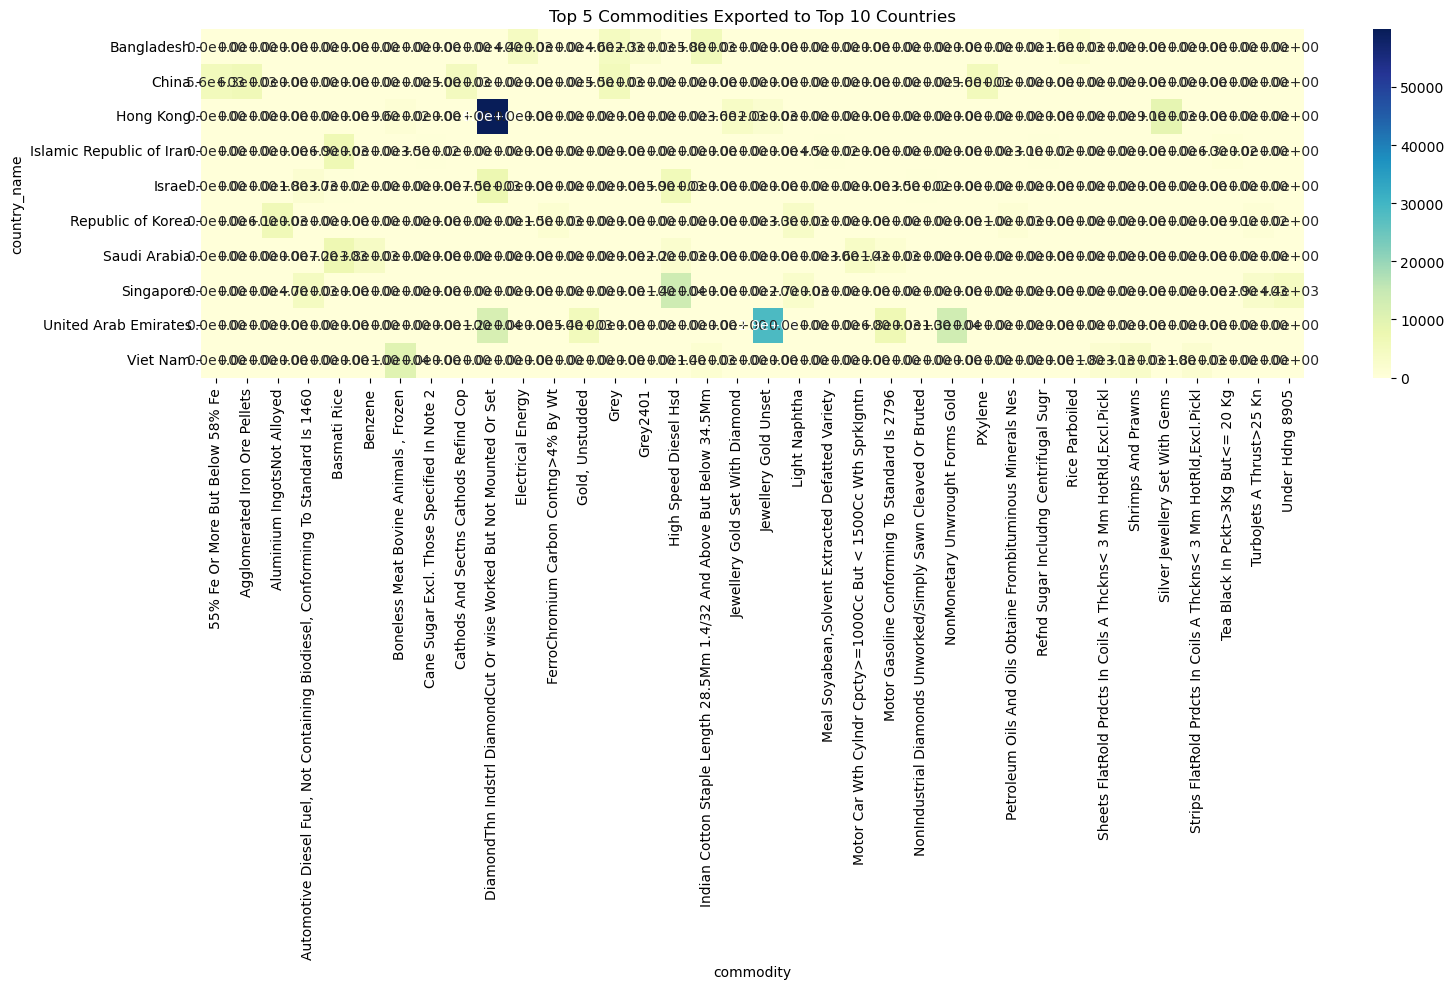

In [272]:
country_commodity_exports = df.groupby(['country_name', 'commodity'])['value_dl'].sum().reset_index()

top_commodities_by_country = country_commodity_exports.loc[
    country_commodity_exports.groupby('country_name')['value_dl'].idxmax()
]

top_commodities_by_country = top_commodities_by_country.sort_values('value_dl', ascending=False)

top_10_countries = top_commodities_by_country['country_name'].head(10).tolist()
country_top5_commodities = df[df['country_name'].isin(top_10_countries)]
country_top5_commodities = country_top5_commodities.groupby(['country_name', 'commodity'])['value_dl'].sum().reset_index()

top5_per_country = []
for country in top_10_countries:
    country_data = country_top5_commodities[country_top5_commodities['country_name'] == country]
    top5_per_country.append(country_data.nlargest(5, 'value_dl'))

top5_per_country = pd.concat(top5_per_country)

heatmap_data = top5_per_country.pivot_table(index='country_name', columns='commodity', values='value_dl', fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.1e', cmap='YlGnBu')
plt.title('Top 5 Commodities Exported to Top 10 Countries')
plt.tight_layout()
plt.show()

In [273]:
bottom_10_countries = df.groupby('country_name')['value_dl'].sum().sort_values().head(10)
print(bottom_10_countries)

country_name
State of Palestine                         6.03
Macao                                     40.68
Timor-Leste                              123.12
Mongolia                                 149.41
Lao People's Democratic Republic         219.33
Democratic People's Republic of Korea    242.74
Tajikistan                               261.47
Kyrgyzstan                               268.15
Azerbaijan                               408.50
Brunei Darussalam                        416.84
Name: value_dl, dtype: float64


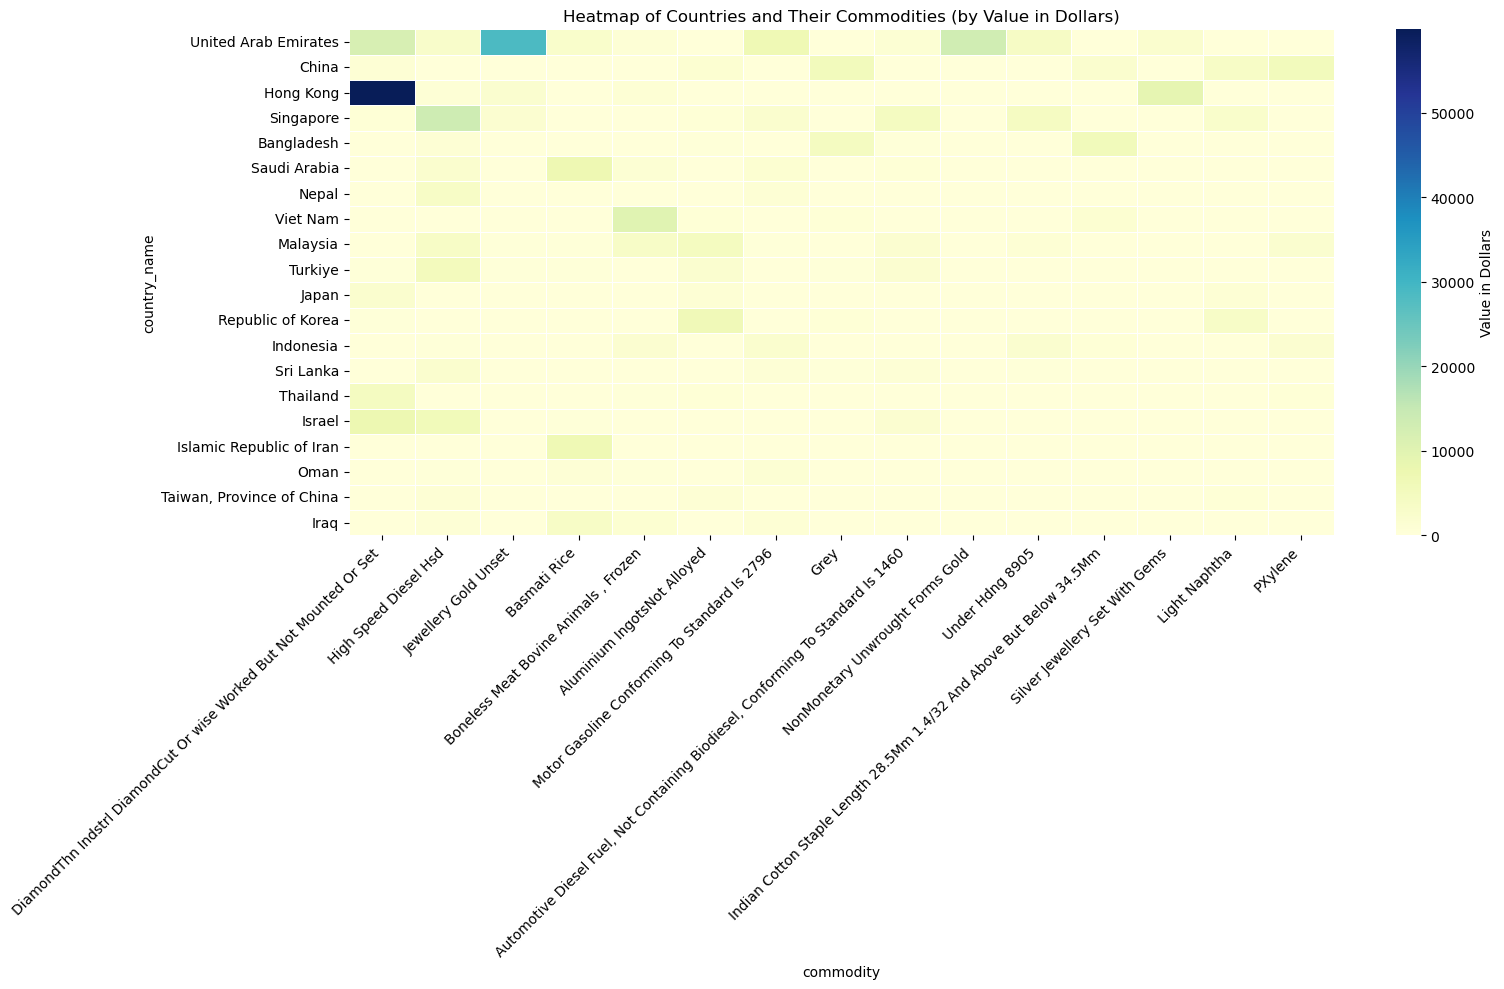

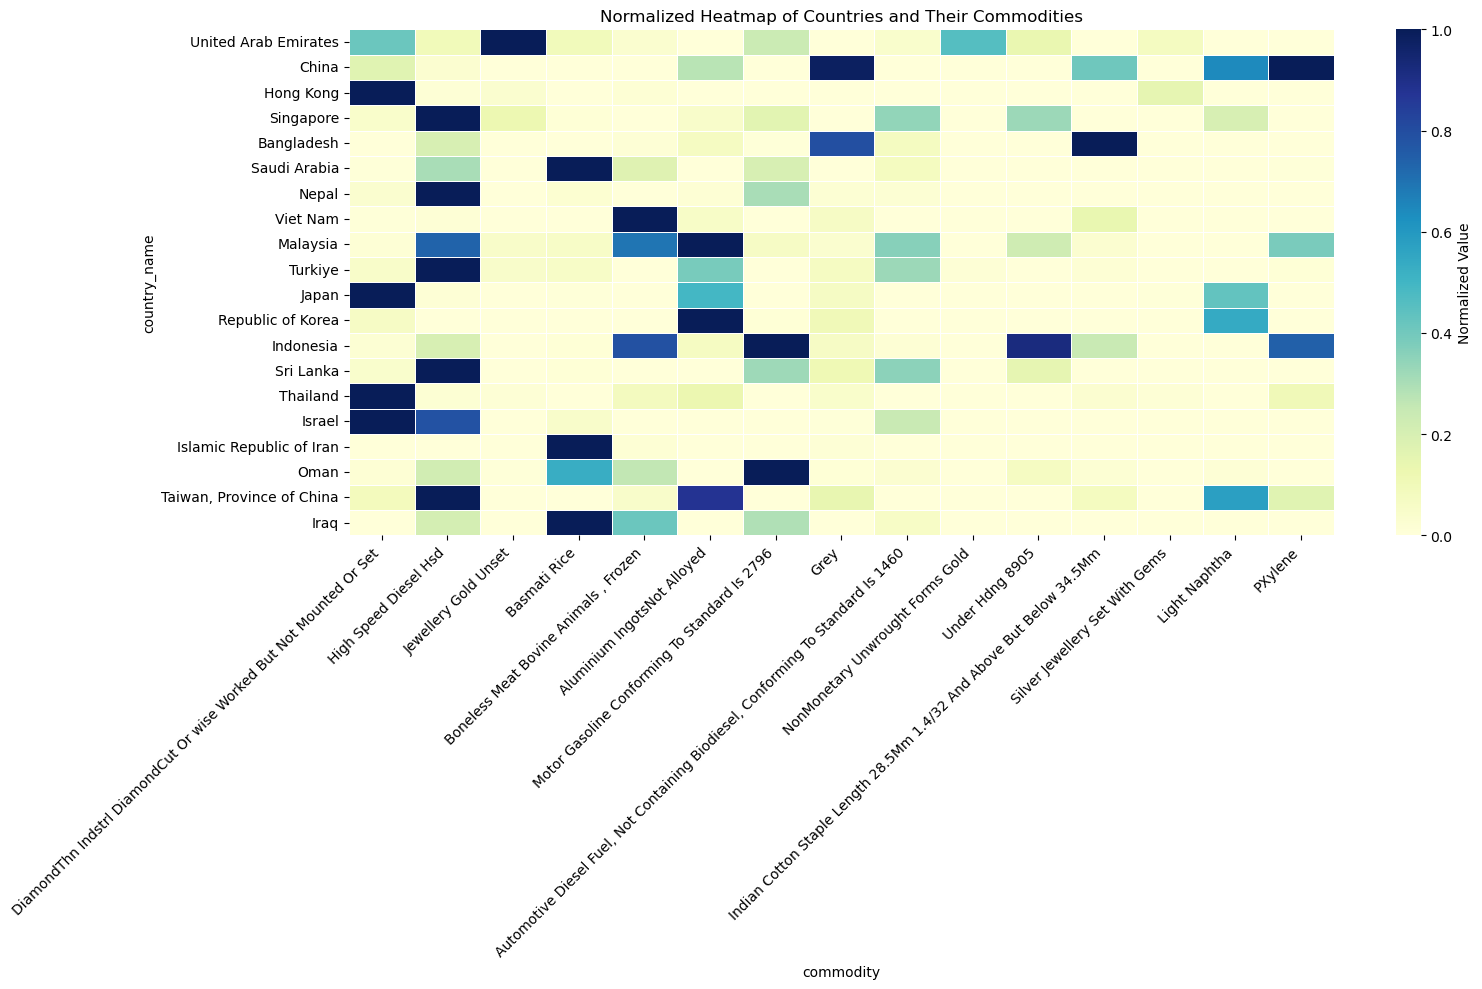

In [274]:
heatmap_data = df.pivot_table(
    index='country_name',
    columns='commodity',
    values='value_dl',  
    aggfunc='sum'
)

heatmap_data = heatmap_data.fillna(0)

top_countries = df.groupby('country_name')['value_dl'].sum().nlargest(20).index

top_commodities = df.groupby('commodity')['value_dl'].sum().nlargest(15).index

# Filter the heatmap data
heatmap_data = heatmap_data.loc[top_countries, top_commodities]

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu', 
    annot=False,    
    fmt='.0f',    
    linewidths=0.5,
    cbar_kws={'label': 'Value in Dollars'}
)

plt.title('Heatmap of Countries and Their Commodities (by Value in Dollars)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1),
    cmap='YlGnBu',
    annot=False,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Normalized Value'}
)

plt.title('Normalized Heatmap of Countries and Their Commodities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [275]:
unique_commodities = df['commodity'].value_counts().head(10)
print(unique_commodities)

commodity
Grey                                   13803
Shirting Fabrics                       11584
Dresses Cotton                          7366
Parts                                   7332
NonGalvanised                           6072
Powder                                  4859
Ensembles Cotton                        4811
Saree                                   4715
Medcne Put Up For Retail Sale N.E.S     4712
Utensils                                4152
Name: count, dtype: int64


<h2 style="background-color: black; color:darkorange"> 5. Insight Generation and Report</h2> 

* <h3 style="background-color: GreenYellow; color: DeepPink">Key Insight :</h3>
  
  * Top expoterd from India to other 10 countries.
  *  Highest Exported products from India 
  *  Finding which year has highest export.


* <h3 style="background-color: GreenYellow; color: DeepPink">Interpretation of results </h3>

* <h4 style="color: SlateBlue">Which country has highest income produced:</h4>
   
   |Sl.No|Country Name|
   |---|----------|
   |1|United Arab Emirates|
   |2|China|
   |3|Hong Kong|
   |4|Bangladesh|
   |5|Singapore|
   |6|Nepal|
   |7|Viet Nam|
   |8|Saudi Arabia|
   |9|Malasia|
   |10|Turkiey|

* <h4 style="color: SlateBlue">Top exported product by Year:</h4>
  
   |Sl.No|Year|
   |-----|-----|
   |1|2018|
   |2|2017|
   |3|2016|
   |4|2015|
   |5|2021|
   |6|2019|
   |7|2020|
   |8|2024|
   |9|2025|


* <h4 style="color: SlateBlue">Top exported from India to other 10 countries:</h4>

   |Sl.No|Country Name|Export Percentage|
   |---|----------|-----------|
   |1.| United Arab Emirates|26.3%|
   |2.|China|14.3%|
   |3.|Hong Kong|11.5%|
   |4.|Singapore|9.1%|
   |5.|Bangladesh|8.9%|
   |6.|Saudi Arabia|6.8%|
   |7.|Nepal|6.3%|
   |8.|Malaysia|6.0%|
   |9.|VietNam|5.9%|
   |10.|Turkiye|4.9%|

* <h4 style="color: SlateBlue">During each year highest exported product during each year:</h4>

  |Year|Product 1|Product 2|Product 3|
  |-----|-----|----|------|
  |2015|Diamond   |High Speed Diesel|Non-monetary Unwrought forms of Gold|
  |2016|Diamond|High Speed Diesel|Non-monetary Unwrought forms of Gold|
  |2017|Diamond|High Speed Diesel|Jwellery Gold Unset|
  |2018|Diamond|High Speed Diesel|Jwellery Gold Unset|
  |2019|Diamond|High Speed Diesel|Jwellery Gold Unset|
  |2020|Diamond|Basmathi Rice|Automotive Diesel fuel not contains Biodiesel,confirming to standard is 1460|
  |2021|Diamond|Automotive Diesel fuel not contains Biodiesel,confirming to standard is 1460|Motor Gasoline confirming to Standard is 2796|
  |2024|Diamond|Motor Gasoline confirming to Standard is 2796|Aeroplane & aircraft,An unladden weight exceeding 15000Kg|
  |2025|     Diamond|Motor Gasoline confirming to Standard is 2796|Gold Unstudded|

* <h4 style="color: SlateBlue">Top 20 commodity exported from India:</h4>

  |Sl.No|Commodity|
  |-----|-----|
  |1.|Grey|
  |2.|Shirting Fabric|
  |3.|Dresses Cotton|
  |4.|Parts|
  |5.|Non-Galvanised|
  |6.|Powder|
  |7.|Ensembles Cotton|
  |8.|Sarees|
  |9.|Medicine put up for retail sales|
  |10.|Utensils|
  |11.|Values,Inlets & Exhaust|
  |12.|Parts & acessories of vehicle|
  |13.|Carpets|
  |14.|Article Plastic Nes|
  |15.|Shirt Fiber|
  |16.|Instruments & Applinces|
  |17.|Medicine Ayurvedic System|
  |18.|Suits Cotton|
  |19.|Labels|
  |20.|Parts and acessories|


*  <h4 style="color: SlateBlue">Find top 10 exported products by country:</h4>

  |Sl.No|Country Name|Commodity|
  |-----|-----|----|
  |1|Hong Kong|Diamond|
  |2|United Arab Emirates|Jwellery Gold Unset|
  |3|Singapore|High Speed Diesel|
  |4|Vietnam|Boneless meat Bovine animals,Frozen|
  |5|Israel|Diamond|
  |6|Saudi Arabia|Basmathi Rice|
  |7|Islamic Republic of Iran|Basmathi Rice|
  |8|China|Agglomerated Iorn Ore pellets|
  |9|Repubic of Korea|Aluminium Ingot not alloyed|
  |10|Bangladesh|Indian cotton staple length 28.5Mm 1.4/32 & above but bellow 34.5Mm.|

<h3 style="background-color: Black; color: DeepPink">Recomentations </h3>

* Highest income produced is from United Arab Emirates,lowest income produced State of Palastien.
* Top exporting year is 2018 and lowest year is 2025.

📈 Strategic Recommendations for Improving India's Exports
Based on the provided data tables, India's export performance is heavily reliant on a few key products and markets. To enhance export growth, the strategy should focus on **value chain upgrading, market diversification, and improving product data granularity**.



<h4 style="color: SlateBlue">1. Value Chain Upgrading for Core Products💎 </h4>
The data shows a consistent reliance on Diamonds and Refined Petroleum Products (High Speed Diesel, Motor Gasoline). The recommendation is to push exports higher up the value chain for these dominant sectors.

|Current Export (Product 1/2/3)|Target Upgrade (Product/Action)|Target Market|
|-----|---------|-----------|
|**Diamond** (Hong Kong, Israel)|Increase **finished, branded jewellery exports** (e.g., Jwellery Gold Unset, Gold Unstudded).|**UAE, Singapore**, and new high-income markets (e.g., EU, US).|
|**High Speed Diesel, Motor Gasoline** (Singapore)|Export higher-value **specialty chemicals** and **lubricants** that use petroleum byproducts.|**Vietnam** (growing economy), **Turkiye**, and new industrial markets.|
|**Agglomerated Iron Ore Pellets** (China)|Shift to exporting **finished steel products** and **high-value iron/steel articles** (Capitalize on the "Non-Galvanised" commodity).|**China** (to capture domestic demand),**Malaysia**.|

**Action**: Implement Production-Linked Incentive (PLI) schemes specifically for value-added jewellery manufacturing and advanced chemical refining to make the shift financially attractive.
________________________________________


<h4 style="color: SlateBlue">2. Market and Product Diversification 🌏</h4>
India's exports are concentrated, with the UAE, China, and Hong Kong accounting for over 50% of the top 10 market share. Diversification is key to mitigating risks from trade shocks (like new tariffs or geopolitical issues).

•	**Boost Agricultural Exports:** Capitalize on the established market for **Basmathi Rice** in **Saudi Arabia** and **Iran**. Invest in **cold chain infrastructure** and **branding** to increase high-value perishables like frozen **Boneless meat Bovine animals** to **Vietnam** and new markets in Southeast Asia.
 
  o	  **Rationale:** This strengthens India's role as a major food supplier, providing resilience against global industrial demand fluctuations.

•	**Target Manufacturing in Key Markets:** Leverage the high export potential commodities that appear low on the country-specific lists (e.g., **Medicine put up for retail sales, Parts & acessories of vehicle**).
   
o	**China**: Aggressively market high-quality **Pharmaceuticals** (a top-20 commodity) and **Parts & accessories of vehicle** to China's large consumer and industrial base.
    
o	**Turkiye**: Use this nation as a gateway to Europe, focusing on textiles **(Shirting Fabric, Dresses Cotton, Suits Cotton)** and auto components (**Parts, Values,Inlets & Exhaust**).

**Action**: Focus on concluding **Free Trade Agreements (FTAs)** with other high-growth economies to reduce tariff barriers for these non-traditional export products.

<h4 style="color: SlateBlue">3. Improve Product Data and Cluster Development 🏭</h4> 

The "Top 20 commodity exported" list is too vague (e.g., Grey, Parts, Powder). This lack of detail makes targeted policy intervention difficult.

•	**Data Granularity**: Mandate the use of the **HS-6 digit classification** for the top 20 commodities to identify the **specific, high-demand products** within generic categories (e.g., distinguishing between different types of 'Parts & acessories of vehicle' or 'Medicine').

•	**Cluster Development**: Invest in **Mega Common Facility Centres (CFCs)** in key export clusters (e.g., textile hubs for cotton products to Bangladesh, engineering hubs for 'Parts' to Korea/Malaysia). This centralizes infrastructure, lowers production costs, and standardizes quality for MSMEs.

**Action**: Establish a dedicated, high-level **Export Acceleration Task Force** to monitor the progress of non-traditional exports and address real-time logistical or regulatory hurdles faced by exporters.